In [10]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
# Reducers
from typing import Annotated
from langgraph.graph.message import add_messages
from IPython.display import Image, display
import os
from dotenv import load_dotenv
load_dotenv()

True

In [11]:
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [12]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [13]:
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq

llm_openai=ChatOpenAI(model_name="gpt-4o-mini", temperature=0)
llm_groq=ChatGroq(model_name="qwen/qwen3-32b", temperature=0)

llm_groq.invoke("Hello, world!")

AIMessage(content='<think>\nOkay, the user said "Hello, world!" which is a classic first program in many programming languages. I should respond in a friendly and welcoming way. Maybe acknowledge their greeting and offer help. Let me keep it simple and positive. Something like "Hello! How can I assist you today?" That should work.\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 12, 'total_tokens': 91, 'completion_time': 0.162000079, 'completion_tokens_details': None, 'prompt_time': 0.00059873, 'prompt_tokens_details': None, 'queue_time': 0.06098432, 'total_time': 0.162598809}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bd1c1-3de0-71a1-ae76-61624524ef3b-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 12, 'output_tokens':

In [14]:
# Nodes Creation

def chatbot(state:State):
    return {"messages": [llm_groq.invoke(state["messages"])]}

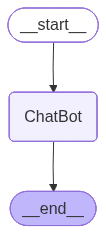

In [15]:
graph= StateGraph(State)

graph.add_node("ChatBot", chatbot)
graph.add_edge(START, "ChatBot")
graph.add_edge("ChatBot", END)

graph_builder= graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [16]:
# Invocation Example

result= graph_builder.invoke({"messages": ["Hello, my name is Cynthia. I love to play badminton."]})
print(result)

{'messages': [HumanMessage(content='Hello, my name is Cynthia. I love to play badminton.', additional_kwargs={}, response_metadata={}, id='6f9e01e3-fe26-4fb5-b1ac-0c588a4b978a'), AIMessage(content="<think>\nOkay, the user introduced herself as Cynthia and mentioned she loves playing badminton. I need to respond in a friendly and engaging way. Let me start by greeting her and acknowledging her interest in badminton. Maybe ask her how long she's been playing or what she enjoys most about it. That could lead to a conversation about her experiences or tips for improving. I should keep it open-ended to encourage her to share more. Also, make sure the tone is positive and supportive. Let me check if there's anything else I should consider. No, that should be good. Let's put it all together.\n</think>\n\nHello Cynthia! 🏸 It's great to meet you. Badminton is such an exciting sport – I'd love to hear more about what draws you to it! Do you play recreationally with friends, or are you more compe

In [18]:
# Streaming responses

for event in graph_builder.stream({"messages":"Hello, I am Cynthia"}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello, I am Cynthia', additional_kwargs={}, response_metadata={}, id='84d876a0-6e7b-43c9-9d1a-9334680d0d7d')]}
{'messages': [HumanMessage(content='Hello, I am Cynthia', additional_kwargs={}, response_metadata={}, id='84d876a0-6e7b-43c9-9d1a-9334680d0d7d'), AIMessage(content='<think>\nOkay, the user said "Hello, I am Cynthia". First, I need to respond politely and confirm their identity. I should greet them back and ask how I can assist. Keep it friendly and open-ended. Maybe add an emoji to keep the tone light. Let me make sure there\'s no need for further information unless they ask. Just a simple, welcoming response.\n</think>\n\nHello Cynthia! 😊 Nice to meet you! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 97, 'prompt_tokens': 13, 'total_tokens': 110, 'completion_time': 0.223812071, 'completion_tokens_details': None, 'prompt_time': 0.000537464, 'prompt_tokens_details': None, 'queue_ti